In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import json

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [12]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station


In [15]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [ ]:
columns=inspector.get_columns('measurement')

for column in columns:
    print(column['name'], column['type'])

In [ ]:
## the inpsector function isn't always working. As a backup, I created dataframes \
##to learn column names
columns=inspector.get_columns('station')

for column in columns:
    print(column['name'], column['type'])

In [16]:
measurement_df=pd.read_sql_query('SELECT * FROM measurement', conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [42]:
station_df=pd.read_sql_query('SELECT * FROM station',conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


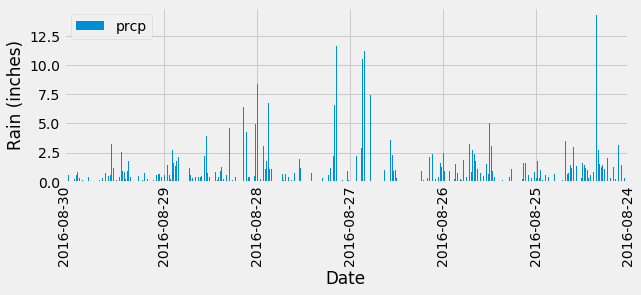

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

rain_data = pd.read_sql_query("SELECT prcp, date FROM measurement\
                              WHERE date BETWEEN '2016-08-24' and '2017-08-23'", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
rain_data_for_plot = rain_data.groupby(['date']).sum()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure

rain_plot=rain_data_for_plot.plot(kind='bar', figsize=(9, 3))

rain_plot.set_xlabel('Date')
rain_plot.set_ylabel('Rain (inches)')
 
axes=plt.axes()
axes.set_xlim(365)
axes.set_xticks([1, 60, 120, 180, 240, 300, 365])

plt.show()

#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT











In [39]:
rain_data_for_plot.describe()

,prcp
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_stats = pd.read_sql_query("SELECT prcp FROM measurement", conn)

summary_stats.describe()


,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_df = pd.read_sql_query('SELECT id, station, name FROM station', conn)
station_df



,id,station,name
0,1,USC00519397,"WAIKIKI 717.2, HI US"
1,2,USC00513117,"KANEOHE 838.1, HI US"
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,4,USC00517948,"PEARL CITY, HI US"
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,7,USC00519281,"WAIHEE 837.5, HI US"
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [38]:

measurement_df = pd.read_sql_query('SELECT * FROM measurement', conn)

measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.



stationcount_df = pd.read_sql_query("SELECT measurement.station, station.name, COUNT(measurement.id) AS 'total records' \
                                    FROM measurement \
                                    INNER JOIN station ON measurement.station=station.station \
                                    GROUP BY measurement.station  ORDER BY COUNT(measurement.id) DESC", conn)
                                    



stationcount_df

,station,name,total records
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 


tempcount_df = pd.read_sql_query("SELECT measurement.station, station.name, COUNT(measurement.tobs) AS 'total temp records' \
                                    FROM measurement \
                                    INNER JOIN station ON measurement.station=station.station \
                                    GROUP BY measurement.station  ORDER BY COUNT(measurement.tobs) DESC", conn)

tempcount_df

,station,name,total temp records
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [22]:

# highest temperature recorded, and average temperature of the most active station?

activestation_df = pd.read_sql_query("SELECT station, MIN(tobs) AS 'minimum temp', \
        MAX(tobs) AS 'maximum temp', AVG(tobs) AS 'average temp' FROM measurement \
        WHERE station = 'USC00519281'", conn)
activestation_df

,station,minimum temp,maximum temp,average temp
0,USC00519281,54.0,85.0,71.663781


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
tempplot_df=pd.read_sql_query("SELECT station, tobs FROM Measurement WHERE \
                        date BETWEEN '2016-08-24' and '2017-08-23' \
                        AND station = 'USC00519281'", conn)

tempplot_df
                            

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
...,...,...
346,USC00519281,77.0
347,USC00519281,77.0
348,USC00519281,76.0
349,USC00519281,76.0


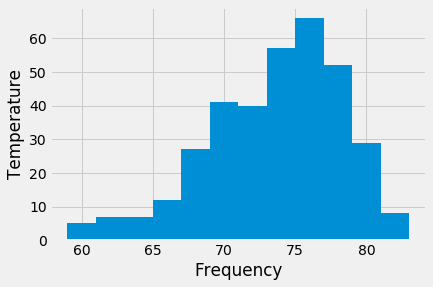

In [24]:
#plot the results as a histogram
x=tempplot_df['tobs']
bins=[59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83]
plt.hist(x, bins=bins)
plt.xlabel('Frequency')
plt.ylabel('Temperature')

plt.show()

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
start_date='2016-09-13'
end_date="2016-10-13"

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps)




<function calc_temps at 0x00000213E53F3828>


In [80]:
#I solved this problem using the dataframe approach
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

triptemp_df=pd.read_sql_query("SELECT MIN(tobs) AS 'minimum temp', \
        MAX(tobs) AS 'maximum temp', AVG(tobs) AS 'average temp' FROM measurement WHERE \
                        date BETWEEN '2016-09-13' and '2016-10-13'", conn)
triptemp_df



,minimum temp,maximum temp,average temp
0,70.0,83.0,77.771144


<function matplotlib.pyplot.show(*args, **kw)>

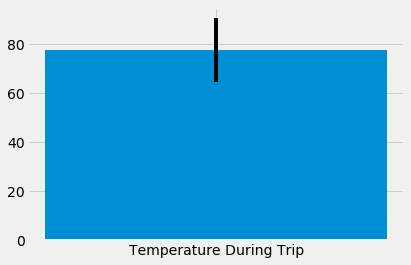

In [93]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avgtemp=triptemp_df['average temp']
mintemp=triptemp_df['minimum temp']
maxtemp=triptemp_df['maximum temp']
errorbar=[13]

plt.figure

plt.bar('Temperature During Trip',avgtemp,yerr=errorbar)

plt.show
 

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the 
#previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, 
#longitude, and elevation

rainfall_df=pd.read_sql_query("SELECT measurement.station, station.name, measurement.prcp, station.latitude, station.longitude, station.elevation \
                FROM measurement INNER JOIN station ON measurement.station=station.station \
                 WHERE measurement.date BETWEEN '2016-09-13' and '2017-10-13' \
                 GROUP BY measurement.station \
                 ORDER BY measurement.prcp DESC", conn) 


rainfall_df


,station,name,prcp,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.20,21.33310,-157.80250,152.4
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.46,21.33556,-157.71139,19.5
2,USC00513117,"KANEOHE 838.1, HI US",0.37,21.42340,-157.80150,14.6
3,USC00519281,"WAIHEE 837.5, HI US",0.34,21.45167,-157.84889,32.9
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.32,21.52130,-157.83740,7.0
5,USC00519397,"WAIKIKI 717.2, HI US",0.02,21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9


In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

dailynormals_df=pd.read_sql_query("SELECT station, tobs FROM measurement WHERE date = '%%-10-12'", conn) 

dailynormals_df

,station,tobs


In [59]:

date = '%%-10-12'

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
     
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
